# **EXERCÍCIO 1**

## Matplotlib

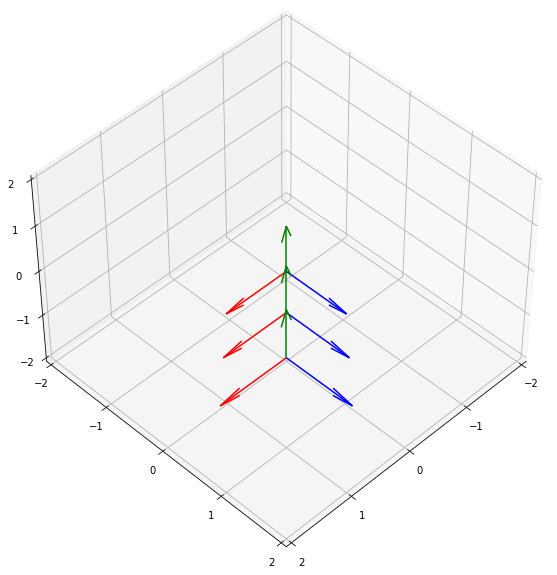

array([[1., 0., 0., 2.],
       [0., 1., 0., 2.],
       [0., 0., 1., 2.],
       [0., 0., 0., 1.]])

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
from mpl_toolkits.mplot3d import Axes3D

######################################################################################
############################### FUNÇÕES DE ROTAÇÃO ###################################
######################################################################################
def rotx(phi):
    phi = np.radians(phi)  
    cp = np.cos(phi)
    sp = np.sin(phi)
    return np.array(( (1,  0,   0), 
                      (0, cp, -sp),
                      (0, sp,  cp) ))

def roty(theta):
    theta = np.radians(theta)  
    ct = np.cos(theta)
    st = np.sin(theta)
    return np.array(( (ct,  0, st), 
                      (  0, 1, 0 ),
                      (-st, 0, ct) ))

def rotz(psi):
    psi = np.radians(psi)  
    cp = np.cos(psi)
    sp = np.sin(psi)
    return np.array((  (cp, -sp, 0), 
                       (sp,  cp, 0),
                       ( 0,   0, 1) ))

def rotzyx(yaw, pitch, roll):
  return np.dot(rotz(yaw), roty(pitch)).dot(rotx(roll))

#Função que cria tranformações homogêneas
def t_homogenea3d(yaw, pitch, roll, xt, yt, zt):
  R = rotzyx(yaw, pitch, roll)
  return np.array(( (R[0][0], R[0][1], R[0][2], xt), 
                    (R[1][0], R[1][1], R[1][2], yt),
                    (R[2][0], R[2][1], R[2][2], zt),
                    (      0,       0,       0,  1) ))

######################################################################################
############################### APLICANDO AS ROTAÇÕES ################################
######################################################################################

#Vetores das setas do sistema {A}, dados no próprio referencial em coordenadas homogêneas
Oa = np.array((0,0,0,1)) # Origem {A}
Xa = np.array((1,0,0,1)) # seta do eixo x (vermelho) dadas em {A}
Ya = np.array((0,1,0,1)) # seta do eixo y (azul) dadas em {A}
Za = np.array((0,0,1,1)) # seta do eixo z (verde) dadas em {A}

Ob = np.array((0,0,0,1)) # Origem {B}
Xb = np.array((1,0,0,1)) # seta do eixo x (vermelho) dadas em {B}
Yb = np.array((0,1,0,1)) # seta do eixo y (azul) dadas em {B}
Zb = np.array((0,0,1,1)) # seta do eixo z (verde) dadas em {B}

Oc = np.array((0,0,0,1)) # Origem {C}
Xc = np.array((1,0,0,1)) # seta do eixo x (vermelho) dadas em {C}
Yc = np.array((0,1,0,1)) # seta do eixo y (azul) dadas em {C}
Zc = np.array((0,0,1,1)) # seta do eixo z (verde) dadas em {C}

#Transformações
#Criacao da matriz de transformacao homogenea T(B->A)
T1 = t_homogenea3d(0,0,0,1,1,1) #Tranformação: Rotação em torno de z de 30° e deslocamento de 0.5 em x e y
Ob2a = np.dot(T1,Ob)
Xb2a = np.dot(T1,Xb)
Yb2a = np.dot(T1,Yb)
Zb2a = np.dot(T1,Zb)

#Criacao da matriz de transformacao homogenea T(C->B)
T2 = t_homogenea3d(0,0,0,1,1,1) #Tranformação: Rotação em torno de z de 30° e deslocamento de 0.5 em x e y

#Criacao da matriz de transformacao homogenea T(C->A) pelo produto das outras duas (cortando o indice do meio cima e baixo)
T3 = np.dot(T1,T2)

Oc2a = np.dot(T3,Oc)
Xc2a = np.dot(T3,Xc)
Yc2a = np.dot(T3,Yc)
Zc2a = np.dot(T3,Zc)

######################################################################################
############################### PLOT #################################################
######################################################################################

fig = plt.figure(figsize=(10,10))

#ax = fig.gca(projection='3d') #funcao que estava inicialmente no codigo do Lucas Vago
ax = plt.axes(projection='3d')

ax.quiver(Oa[0], Oa[1], Oa[2], Xa[0], Xa[1], Xa[2], color='r')
ax.quiver(Oa[0], Oa[1], Oa[2], Ya[0], Ya[1], Ya[2], color='b')
ax.quiver(Oa[0], Oa[1], Oa[2], Za[0], Za[1], Za[2], color='g')

ax.quiver(Ob2a[0], Ob2a[1], Ob2a[2], Xb2a[0]-Ob2a[0], Xb2a[1]-Ob2a[1], Xb2a[2]-Ob2a[2], color='r')
ax.quiver(Ob2a[0], Ob2a[1], Ob2a[2], Yb2a[0]-Ob2a[0], Yb2a[1]-Ob2a[1], Yb2a[2]-Ob2a[2], color='b')
ax.quiver(Ob2a[0], Ob2a[1], Ob2a[2], Zb2a[0]-Ob2a[0], Zb2a[1]-Ob2a[1], Zb2a[2]-Ob2a[2], color='g')

ax.quiver(Oc2a[0], Oc2a[1], Oc2a[2], Xc2a[0]-Oc2a[0], Xc2a[1]-Oc2a[1], Xc2a[2]-Oc2a[2], color='r')
ax.quiver(Oc2a[0], Oc2a[1], Oc2a[2], Yc2a[0]-Oc2a[0], Yc2a[1]-Oc2a[1], Yc2a[2]-Oc2a[2], color='b')
ax.quiver(Oc2a[0], Oc2a[1], Oc2a[2], Zc2a[0]-Oc2a[0], Zc2a[1]-Oc2a[1], Zc2a[2]-Oc2a[2], color='g')

ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.zaxis.set_major_locator(MultipleLocator(1))

lim = 2.0
ax.set_xlim3d(-lim, lim)
ax.set_ylim3d(-lim,lim)
ax.set_zlim3d(-lim,lim)
ax.view_init(elev=45, azim=45)
plt.grid(True)
plt.show()

T3

## Plotly (interativo)

In [59]:
import plotly.graph_objects as go
import numpy as np

######################################################################################
############################### FUNÇÕES DE ROTAÇÃO ###################################
######################################################################################
def rotx(phi):
    phi = np.radians(phi)  
    cp = np.cos(phi)
    sp = np.sin(phi)
    return np.array(( (1,  0,   0), 
                      (0, cp, -sp),
                      (0, sp,  cp) ))

def roty(theta):
    theta = np.radians(theta)  
    ct = np.cos(theta)
    st = np.sin(theta)
    return np.array(( (ct,  0, st), 
                      (  0, 1, 0 ),
                      (-st, 0, ct) ))

def rotz(psi):
    psi = np.radians(psi)  
    cp = np.cos(psi)
    sp = np.sin(psi)
    return np.array((  (cp, -sp, 0), 
                       (sp,  cp, 0),
                       ( 0,   0, 1) ))

def rotzyx(yaw, pitch, roll):
  return np.dot(rotz(yaw), roty(pitch)).dot(rotx(roll))

#Função que cria tranformações homogêneas
def t_homogenea3d(yaw, pitch, roll, xt, yt, zt):
  R = rotzyx(yaw, pitch, roll)
  return np.array(( (R[0][0], R[0][1], R[0][2], xt), 
                    (R[1][0], R[1][1], R[1][2], yt),
                    (R[2][0], R[2][1], R[2][2], zt),
                    (      0,       0,       0,  1) ))

######################################################################################
############################### APLICANDO AS ROTAÇÕES ################################
######################################################################################
#Vetores das setas do sistema {A}, dados no próprio referencial em coordenadas homogêneas
Oa = np.array((0,0,0,1)) # Origem {A}
Xa = np.array((1,0,0,1)) # seta do eixo x (vermelho) dadas em {A}
Ya = np.array((0,1,0,1)) # seta do eixo y (azul) dadas em {A}
Za = np.array((0,0,1,1)) # seta do eixo z (verde) dadas em {A}

Ob = np.array((0,0,0,1)) # Origem {B}
Xb = np.array((1,0,0,1)) # seta do eixo x (vermelho) dadas em {B}
Yb = np.array((0,1,0,1)) # seta do eixo y (azul) dadas em {B}
Zb = np.array((0,0,1,1)) # seta do eixo z (verde) dadas em {B}

Oc = np.array((0,0,0,1)) # Origem {C}
Xc = np.array((1,0,0,1)) # seta do eixo x (vermelho) dadas em {C}
Yc = np.array((0,1,0,1)) # seta do eixo y (azul) dadas em {C}
Zc = np.array((0,0,1,1)) # seta do eixo z (verde) dadas em {C}

#Rotações
T1 = t_homogenea3d(0,0,0,1,1,1) #Tranformação: Rotação em torno de z de 30° e deslocamento de 0.5 em x e y
Ob2a = np.dot(T1,Ob)
Xb2a = np.dot(T1,Xb)
Yb2a = np.dot(T1,Yb)
Zb2a = np.dot(T1,Zb)

T2 = t_homogenea3d(0,0,0,1,1,1) #Tranformação: Rotação em torno de z de 30° e deslocamento de 0.5 em x e y

T3 = np.dot(T1,T2)

Oc2a = np.dot(T3,Ob)
Xc2a = np.dot(T3,Xb)
Yc2a = np.dot(T3,Yb)
Zc2a = np.dot(T3,Zb)

Pb = (0, 0, 0.5, 1)
Pb_t = np.array(Pb).T # para multiplicar pela transformacao homogenea inversa

Pb2a = np.dot(T1, Pb_t)

Pc = (0, 0, 0.5, 1)
Pc_t = np.array(Pc).T # para multiplicar pela transformacao homogenea inversa

Pc2a = np.dot(T3, Pc_t)

######################################################################################
############################### PLOT #################################################
######################################################################################
print("T1: \n", T1)
print("\nT2: \n", T2)
print("\nT3: \n", T3)

print("\nPb: ", np.array(Pb))
print("Pb2a: ", Pb2a)
print("\nPc: ", np.array(Pc))
print("Pc2a: ", Pc2a)

print("\n\nUse o mouse para interagir com a figura gerada: ")

X = np.zeros((2, 3))
Y = np.zeros((2, 3))
Z = np.zeros((2, 3))

X[0,:] = Oa[:3] #Pega os três primeiros elementos apenas
X[1,:] = Xa[:3]
Y[0,:] = Oa[:3]
Y[1,:] = Ya[:3]
Z[0,:] = Oa[:3]
Z[1,:] = Za[:3]

X2 = np.zeros((2, 3))
Y2 = np.zeros((2, 3))
Z2 = np.zeros((2, 3))

X2[0,:] = Ob2a[:3]
X2[1,:] = Xb2a[:3]
Y2[0,:] = Ob2a[:3]
Y2[1,:] = Yb2a[:3]
Z2[0,:] = Ob2a[:3]
Z2[1,:] = Zb2a[:3]

X3 = np.zeros((2, 3))
Y3 = np.zeros((2, 3))
Z3 = np.zeros((2, 3))

X3[0,:] = Oc2a[:3]
X3[1,:] = Xc2a[:3]
Y3[0,:] = Oc2a[:3]
Y3[1,:] = Yc2a[:3]
Z3[0,:] = Oc2a[:3]
Z3[1,:] = Zc2a[:3]

fig = go.Figure()

fig.add_trace(go.Scatter3d(x=X[:,0], y=X[:,1], z=X[:,2], mode='lines+text', text=["","xa"], textfont=dict(color="blue"), name='xa', line=dict(color='blue',width=5)))
fig.add_trace(go.Scatter3d(x=Y[:,0], y=Y[:,1], z=Y[:,2], mode='lines+text', text=["","ya"], textfont=dict(color="red"), name='ya', line=dict(color='red',width=5)))
fig.add_trace(go.Scatter3d(x=Z[:,0], y=Z[:,1], z=Z[:,2], mode='lines+text', text=["","za"], textfont=dict(color="green"), name='za',line=dict(color='green',width=5)))

fig.add_trace(go.Scatter3d(x=X2[:,0], y=X2[:,1], z=X2[:,2], mode='lines+text', text=["","xb"], textfont=dict(color="blue"), name='xb', line=dict(color='blue',width=5)))
fig.add_trace(go.Scatter3d(x=Y2[:,0], y=Y2[:,1], z=Y2[:,2], mode='lines+text', text=["","yb"], textfont=dict(color="red"), name='yb',line=dict(color='red',width=5)))
fig.add_trace(go.Scatter3d(x=Z2[:,0], y=Z2[:,1], z=Z2[:,2], mode='lines+text', text=["","zb"], textfont=dict(color="green"), name='zb',line=dict(color='green',width=5)))

fig.add_trace(go.Scatter3d(x=X3[:,0], y=X3[:,1], z=X3[:,2], mode='lines+text', text=["","xc"], textfont=dict(color="blue"), name='xc', line=dict(color='blue',width=5)))
fig.add_trace(go.Scatter3d(x=Y3[:,0], y=Y3[:,1], z=Y3[:,2], mode='lines+text', text=["","yc"], textfont=dict(color="red"), name='yc',line=dict(color='red',width=5)))
fig.add_trace(go.Scatter3d(x=Z3[:,0], y=Z3[:,1], z=Z3[:,2], mode='lines+text', text=["","zc"], textfont=dict(color="green"), name='zc',line=dict(color='green',width=5)))

#Comando de plotar pontos
#Substitua x=[0], y=[0], z=[0] pelas coordenadas do ponto
#fig.add_trace(go.Scatter3d(x=[0], y=[0], z=[0], mode='markers+text',text=["P1",""], name='P1', marker=dict(color='black',size=5)))
#Plot dos pontos

fig.add_trace(go.Scatter3d(x=[Pb2a[0]], y=[Pb2a[1]], z=[Pb2a[2]], mode='markers+text',text=["P1",""], name='P1', marker=dict(color='black',size=5)))

fig.add_trace(go.Scatter3d(x=[Pc2a[0]], y=[Pc2a[1]], z=[Pc2a[2]], mode='markers+text',text=["P1",""], name='P1', marker=dict(color='black',size=5)))

fig.update_layout(
    autosize=False,
    showlegend=False,
    width=500,
    height=500,
    margin=dict(l=0,r=0,t=0,b=0)
)

lim = 4.0
fig.update_scenes(
    aspectmode= "cube",
    xaxis=dict(range=[-1,lim]),
    yaxis=dict(range=[-1,lim]),
    zaxis=dict(range=[-1,lim])
)

T1: 
 [[1. 0. 0. 1.]
 [0. 1. 0. 1.]
 [0. 0. 1. 1.]
 [0. 0. 0. 1.]]

T2: 
 [[1. 0. 0. 1.]
 [0. 1. 0. 1.]
 [0. 0. 1. 1.]
 [0. 0. 0. 1.]]

T3: 
 [[1. 0. 0. 2.]
 [0. 1. 0. 2.]
 [0. 0. 1. 2.]
 [0. 0. 0. 1.]]

Pb:  [0.  0.  0.5 1. ]
Pb2a:  [1.  1.  1.5 1. ]

Pc:  [0.  0.  0.5 1. ]
Pc2a:  [2.  2.  2.5 1. ]


Use o mouse para interagir com a figura gerada: 


# **EXERCÍCIO 2**

## Matplotlib

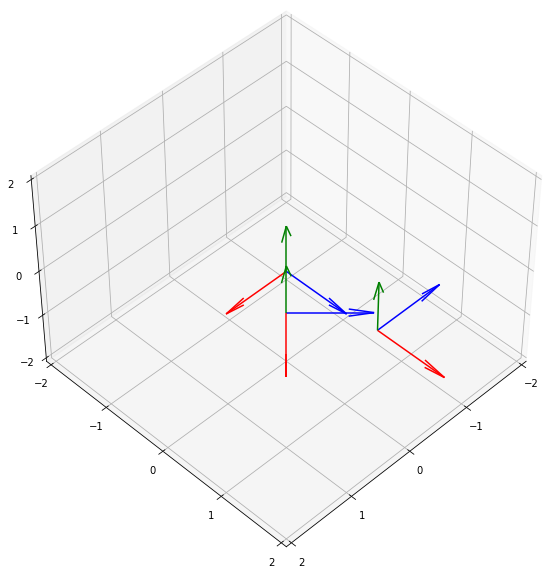

array([[ 0.        , -1.        ,  0.        ,  1.        ],
       [ 1.        ,  0.        ,  0.        ,  2.41421356],
       [ 0.        ,  0.        ,  1.        ,  2.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
from mpl_toolkits.mplot3d import Axes3D

######################################################################################
############################### FUNÇÕES DE ROTAÇÃO ###################################
######################################################################################
def rotx(phi):
    phi = np.radians(phi)  
    cp = np.cos(phi)
    sp = np.sin(phi)
    return np.array(( (1,  0,   0), 
                      (0, cp, -sp),
                      (0, sp,  cp) ))

def roty(theta):
    theta = np.radians(theta)  
    ct = np.cos(theta)
    st = np.sin(theta)
    return np.array(( (ct,  0, st), 
                      (  0, 1, 0 ),
                      (-st, 0, ct) ))

def rotz(psi):
    psi = np.radians(psi)  
    cp = np.cos(psi)
    sp = np.sin(psi)
    return np.array((  (cp, -sp, 0), 
                       (sp,  cp, 0),
                       ( 0,   0, 1) ))

def rotzyx(yaw, pitch, roll):
  return np.dot(rotz(yaw), roty(pitch)).dot(rotx(roll))

#Função que cria tranformações homogêneas
def t_homogenea3d(yaw, pitch, roll, xt, yt, zt):
  R = rotzyx(yaw, pitch, roll)
  return np.array(( (R[0][0], R[0][1], R[0][2], xt), 
                    (R[1][0], R[1][1], R[1][2], yt),
                    (R[2][0], R[2][1], R[2][2], zt),
                    (      0,       0,       0,  1) ))

######################################################################################
############################### APLICANDO AS ROTAÇÕES ################################
######################################################################################

#Vetores das setas do sistema {A}, dados no próprio referencial em coordenadas homogêneas
Oa = np.array((0,0,0,1)) # Origem {A}
Xa = np.array((1,0,0,1)) # seta do eixo x (vermelho) dadas em {A}
Ya = np.array((0,1,0,1)) # seta do eixo y (azul) dadas em {A}
Za = np.array((0,0,1,1)) # seta do eixo z (verde) dadas em {A}

Ob = np.array((0,0,0,1)) # Origem {B}
Xb = np.array((1,0,0,1)) # seta do eixo x (vermelho) dadas em {B}
Yb = np.array((0,1,0,1)) # seta do eixo y (azul) dadas em {B}
Zb = np.array((0,0,1,1)) # seta do eixo z (verde) dadas em {B}

Oc = np.array((0,0,0,1)) # Origem {C}
Xc = np.array((1,0,0,1)) # seta do eixo x (vermelho) dadas em {C}
Yc = np.array((0,1,0,1)) # seta do eixo y (azul) dadas em {C}
Zc = np.array((0,0,1,1)) # seta do eixo z (verde) dadas em {C}

#Transformações
#Criacao da matriz de transformacao homogenea T(B->A)
T1 = t_homogenea3d(45,0,0,1,1,1) #Tranformação: Rotação em torno de z de 30° e deslocamento de 0.5 em x e y
Ob2a = np.dot(T1,Ob)
Xb2a = np.dot(T1,Xb)
Yb2a = np.dot(T1,Yb)
Zb2a = np.dot(T1,Zb)

#Criacao da matriz de transformacao homogenea T(C->B)
T2 = t_homogenea3d(45,0,0,1,1,1) #Tranformação: Rotação em torno de z de 30° e deslocamento de 0.5 em x e y

#Criacao da matriz de transformacao homogenea T(C->A) pelo produto das outras duas (cortando o indice do meio cima e baixo)
T3 = np.dot(T1,T2)

Oc2a = np.dot(T3,Oc)
Xc2a = np.dot(T3,Xc)
Yc2a = np.dot(T3,Yc)
Zc2a = np.dot(T3,Zc)

######################################################################################
############################### PLOT #################################################
######################################################################################

fig = plt.figure(figsize=(10,10))

#ax = fig.gca(projection='3d') #funcao que estava inicialmente no codigo do Lucas Vago
ax = plt.axes(projection='3d')

ax.quiver(Oa[0], Oa[1], Oa[2], Xa[0], Xa[1], Xa[2], color='r')
ax.quiver(Oa[0], Oa[1], Oa[2], Ya[0], Ya[1], Ya[2], color='b')
ax.quiver(Oa[0], Oa[1], Oa[2], Za[0], Za[1], Za[2], color='g')

ax.quiver(Ob2a[0], Ob2a[1], Ob2a[2], Xb2a[0]-Ob2a[0], Xb2a[1]-Ob2a[1], Xb2a[2]-Ob2a[2], color='r')
ax.quiver(Ob2a[0], Ob2a[1], Ob2a[2], Yb2a[0]-Ob2a[0], Yb2a[1]-Ob2a[1], Yb2a[2]-Ob2a[2], color='b')
ax.quiver(Ob2a[0], Ob2a[1], Ob2a[2], Zb2a[0]-Ob2a[0], Zb2a[1]-Ob2a[1], Zb2a[2]-Ob2a[2], color='g')

ax.quiver(Oc2a[0], Oc2a[1], Oc2a[2], Xc2a[0]-Oc2a[0], Xc2a[1]-Oc2a[1], Xc2a[2]-Oc2a[2], color='r')
ax.quiver(Oc2a[0], Oc2a[1], Oc2a[2], Yc2a[0]-Oc2a[0], Yc2a[1]-Oc2a[1], Yc2a[2]-Oc2a[2], color='b')
ax.quiver(Oc2a[0], Oc2a[1], Oc2a[2], Zc2a[0]-Oc2a[0], Zc2a[1]-Oc2a[1], Zc2a[2]-Oc2a[2], color='g')

ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.zaxis.set_major_locator(MultipleLocator(1))

lim = 2.0
ax.set_xlim3d(-lim, lim)
ax.set_ylim3d(-lim,lim)
ax.set_zlim3d(-lim,lim)
ax.view_init(elev=45, azim=45)
plt.grid(True)
plt.show()

T3

## Plotly (interativo)

In [3]:
import plotly.graph_objects as go
import numpy as np

######################################################################################
############################### FUNÇÕES DE ROTAÇÃO ###################################
######################################################################################
def rotx(phi):
    phi = np.radians(phi)  
    cp = np.cos(phi)
    sp = np.sin(phi)
    return np.array(( (1,  0,   0), 
                      (0, cp, -sp),
                      (0, sp,  cp) ))

def roty(theta):
    theta = np.radians(theta)  
    ct = np.cos(theta)
    st = np.sin(theta)
    return np.array(( (ct,  0, st), 
                      (  0, 1, 0 ),
                      (-st, 0, ct) ))

def rotz(psi):
    psi = np.radians(psi)  
    cp = np.cos(psi)
    sp = np.sin(psi)
    return np.array((  (cp, -sp, 0), 
                       (sp,  cp, 0),
                       ( 0,   0, 1) ))

def rotzyx(yaw, pitch, roll):
  return np.dot(rotz(yaw), roty(pitch)).dot(rotx(roll))

#Função que cria tranformações homogêneas
def t_homogenea3d(yaw, pitch, roll, xt, yt, zt):
  R = rotzyx(yaw, pitch, roll)
  return np.array(( (R[0][0], R[0][1], R[0][2], xt), 
                    (R[1][0], R[1][1], R[1][2], yt),
                    (R[2][0], R[2][1], R[2][2], zt),
                    (      0,       0,       0,  1) ))

######################################################################################
############################### APLICANDO AS ROTAÇÕES ################################
######################################################################################
#Vetores das setas do sistema {A}, dados no próprio referencial em coordenadas homogêneas
Oa = np.array((0,0,0,1)) # Origem {A}
Xa = np.array((1,0,0,1)) # seta do eixo x (vermelho) dadas em {A}
Ya = np.array((0,1,0,1)) # seta do eixo y (azul) dadas em {A}
Za = np.array((0,0,1,1)) # seta do eixo z (verde) dadas em {A}

Ob = np.array((0,0,0,1)) # Origem {B}
Xb = np.array((1,0,0,1)) # seta do eixo x (vermelho) dadas em {B}
Yb = np.array((0,1,0,1)) # seta do eixo y (azul) dadas em {B}
Zb = np.array((0,0,1,1)) # seta do eixo z (verde) dadas em {B}

Oc = np.array((0,0,0,1)) # Origem {C}
Xc = np.array((1,0,0,1)) # seta do eixo x (vermelho) dadas em {C}
Yc = np.array((0,1,0,1)) # seta do eixo y (azul) dadas em {C}
Zc = np.array((0,0,1,1)) # seta do eixo z (verde) dadas em {C}

#Rotações
T1 = t_homogenea3d(45,0,0,1,1,1) #Tranformação: Rotação em torno de z de 30° e deslocamento de 0.5 em x e y
Ob2a = np.dot(T1,Ob)
Xb2a = np.dot(T1,Xb)
Yb2a = np.dot(T1,Yb)
Zb2a = np.dot(T1,Zb)

T2 = t_homogenea3d(45,0,0,1,1,1) #Tranformação: Rotação em torno de z de 30° e deslocamento de 0.5 em x e y

T3 = np.dot(T1,T2)

Oc2a = np.dot(T3,Ob)
Xc2a = np.dot(T3,Xb)
Yc2a = np.dot(T3,Yb)
Zc2a = np.dot(T3,Zb)

Pb = (0, 0, 0.5, 1)
Pb_t = np.array(Pb).T # para multiplicar pela transformacao homogenea inversa

Pb2a = np.dot(T1, Pb_t)

Pc = (0, 0, 0.5, 1)
Pc_t = np.array(Pc).T # para multiplicar pela transformacao homogenea inversa

Pc2a = np.dot(T3, Pc_t)

######################################################################################
############################### PLOT #################################################
######################################################################################
print("T1: \n", T1)
print("\nT2: \n", T2)
print("\nT3: \n", T3)

print("\nPb: ", np.array(Pb))
print("Pb2a: ", Pb2a)
print("\nPc: ", np.array(Pc))
print("Pc2a: ", Pc2a)

print("\n\nUse o mouse para interagir com a figura gerada: ")

X = np.zeros((2, 3))
Y = np.zeros((2, 3))
Z = np.zeros((2, 3))

X[0,:] = Oa[:3] #Pega os três primeiros elementos apenas
X[1,:] = Xa[:3]
Y[0,:] = Oa[:3]
Y[1,:] = Ya[:3]
Z[0,:] = Oa[:3]
Z[1,:] = Za[:3]

X2 = np.zeros((2, 3))
Y2 = np.zeros((2, 3))
Z2 = np.zeros((2, 3))

X2[0,:] = Ob2a[:3]
X2[1,:] = Xb2a[:3]
Y2[0,:] = Ob2a[:3]
Y2[1,:] = Yb2a[:3]
Z2[0,:] = Ob2a[:3]
Z2[1,:] = Zb2a[:3]

X3 = np.zeros((2, 3))
Y3 = np.zeros((2, 3))
Z3 = np.zeros((2, 3))

X3[0,:] = Oc2a[:3]
X3[1,:] = Xc2a[:3]
Y3[0,:] = Oc2a[:3]
Y3[1,:] = Yc2a[:3]
Z3[0,:] = Oc2a[:3]
Z3[1,:] = Zc2a[:3]

fig = go.Figure()

fig.add_trace(go.Scatter3d(x=X[:,0], y=X[:,1], z=X[:,2], mode='lines+text', text=["","xa"], textfont=dict(color="blue"), name='xa', line=dict(color='blue',width=5)))
fig.add_trace(go.Scatter3d(x=Y[:,0], y=Y[:,1], z=Y[:,2], mode='lines+text', text=["","ya"], textfont=dict(color="red"), name='ya', line=dict(color='red',width=5)))
fig.add_trace(go.Scatter3d(x=Z[:,0], y=Z[:,1], z=Z[:,2], mode='lines+text', text=["","za"], textfont=dict(color="green"), name='za',line=dict(color='green',width=5)))

fig.add_trace(go.Scatter3d(x=X2[:,0], y=X2[:,1], z=X2[:,2], mode='lines+text', text=["","xb"], textfont=dict(color="blue"), name='xb', line=dict(color='blue',width=5)))
fig.add_trace(go.Scatter3d(x=Y2[:,0], y=Y2[:,1], z=Y2[:,2], mode='lines+text', text=["","yb"], textfont=dict(color="red"), name='yb',line=dict(color='red',width=5)))
fig.add_trace(go.Scatter3d(x=Z2[:,0], y=Z2[:,1], z=Z2[:,2], mode='lines+text', text=["","zb"], textfont=dict(color="green"), name='zb',line=dict(color='green',width=5)))

fig.add_trace(go.Scatter3d(x=X3[:,0], y=X3[:,1], z=X3[:,2], mode='lines+text', text=["","xc"], textfont=dict(color="blue"), name='xc', line=dict(color='blue',width=5)))
fig.add_trace(go.Scatter3d(x=Y3[:,0], y=Y3[:,1], z=Y3[:,2], mode='lines+text', text=["","yc"], textfont=dict(color="red"), name='yc',line=dict(color='red',width=5)))
fig.add_trace(go.Scatter3d(x=Z3[:,0], y=Z3[:,1], z=Z3[:,2], mode='lines+text', text=["","zc"], textfont=dict(color="green"), name='zc',line=dict(color='green',width=5)))

#Comando de plotar pontos
#Substitua x=[0], y=[0], z=[0] pelas coordenadas do ponto
#fig.add_trace(go.Scatter3d(x=[0], y=[0], z=[0], mode='markers+text',text=["P1",""], name='P1', marker=dict(color='black',size=5)))
#Plot dos pontos

fig.add_trace(go.Scatter3d(x=[Pb2a[0]], y=[Pb2a[1]], z=[Pb2a[2]], mode='markers+text',text=["P1",""], name='P1', marker=dict(color='black',size=5)))

fig.add_trace(go.Scatter3d(x=[Pc2a[0]], y=[Pc2a[1]], z=[Pc2a[2]], mode='markers+text',text=["P1",""], name='P1', marker=dict(color='black',size=5)))

fig.update_layout(
    autosize=False,
    showlegend=False,
    width=500,
    height=500,
    margin=dict(l=0,r=0,t=0,b=0)
)

lim = 4.0
fig.update_scenes(
    aspectmode= "cube",
    xaxis=dict(range=[-1,lim]),
    yaxis=dict(range=[-1,lim]),
    zaxis=dict(range=[-1,lim])
)

T1: 
 [[ 0.70710678 -0.70710678  0.          1.        ]
 [ 0.70710678  0.70710678  0.          1.        ]
 [ 0.          0.          1.          1.        ]
 [ 0.          0.          0.          1.        ]]

T2: 
 [[ 0.70710678 -0.70710678  0.          1.        ]
 [ 0.70710678  0.70710678  0.          1.        ]
 [ 0.          0.          1.          1.        ]
 [ 0.          0.          0.          1.        ]]

T3: 
 [[ 0.         -1.          0.          1.        ]
 [ 1.          0.          0.          2.41421356]
 [ 0.          0.          1.          2.        ]
 [ 0.          0.          0.          1.        ]]

Pb:  [0.  0.  0.5 1. ]
Pb2a:  [1.  1.  1.5 1. ]

Pc:  [0.  0.  0.5 1. ]
Pc2a:  [1.         2.41421356 2.5        1.        ]


Use o mouse para interagir com a figura gerada: 
